# Supervised learning is the branch of Machine Learning (ML) that involves predicting labels, such as 'Survived' or 'Not'. 

### Such models learn from labelled data, which is data that includes whether a passenger survived (called "model training"), and then predict on unlabelled data.

## On Kaggle, a platform for predictive modelling and analytics competitions, these are called train and test sets because

You want to build a model that learns patterns in the training set, and
You then use the model to make predictions on the test set.
Kaggle then tells you the percentage that you got correct: this is known as the accuracy of your model.




# Importing libraries and Dataset

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
# Import data
df_train = pd.read_csv('dataset/titan/train.csv')
df_train2=pd.read_csv('E:/datasets/titanic/train.csv')
df_test = pd.read_csv('dataset/titan/test.csv')

# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

# View head
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
Age            332 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Fare           417 non-null float64
Name           418 non-null object
Parch          418 non-null float64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            418 non-null object
SibSp          1309 non-null int64
Ticket         418 non-null object
age            714 non-null float64
cabin          204 non-null object
embarked       889 non-null object
fare           891 non-null float64
name           891 non-null object
parch          891 non-null float64
sex            891 non-null object
ticket         891 non-null object
dtypes: float64(6), int64(3), object(10)
memory usage: 204.5+ KB


C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [4]:
df_train.head(n=4)

,PassengerId,Survived,Pclass,name,sex,age,SibSp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


For data dictionary, refer to Kaggle

Before you continue, it's good to take into account the following when it comes to terminology:

* The target variable is the variable you are trying to predict
* Other variables are known as "features" (or "predictor variables", the features that you're using to predict the target variable).
* With this in mind, you can continue to check out your data with, for example, the head() function, which you can use to pull up the first five rows of your data set:



In [5]:
# View first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Note that the df_test DataFrame doesn't have the 'Survived' column because this is what you will try to predict!

* You can also use the DataFrame .info() method to check out data types, missing values and more (of df_train).


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
SibSp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that there are only 714 non-null values for the 'Age' column in a DataFrame with 891 rows. This means that are are 177 null or missing values.

Also, use the DataFrame .describe() method to check out summary statistics of numeric columns (of df_train).

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,age,SibSp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visual Exploratory Data Analysis (EDA) And Your First Model

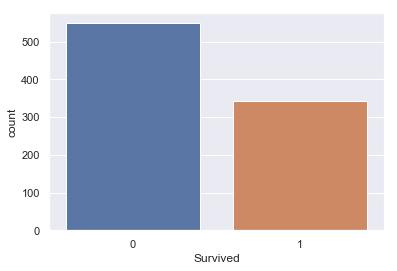

In [8]:
# using seaborn to build a bar plot of Titanic survival, which is our target variable

sns.countplot(x='Survived', data=df_train)

# looks like in the training set, less people survived than didn't. 

Let's build a first model that predicts that nobody survived.

This is a bad model as you know that people survived. But it gives us a baseline: any model that we build later needs to do better than this one.

1. Create a column 'Survived' for df_test that encodes 'did not survive' for all rows;
2. Save 'PassengerId' and 'Survived' columns of df_test to a .csv and submit to Kaggle.


In [9]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('dataset/no_survivors.csv', index=False)

# Submit to Kaggle
# 1st Submission Results



<img src='img/tit1.JPG'>
_____________________________________________________________________________________________________________________________

<img src='img/tit2.JPG'>

# EDA on Feature Variables
### After quick-and-dirty model, it's time to reiterate: let's do some more Exploratory Data Analysis and build another model soon!

#### Building a bar plot of the Titanic dataset feature 'Sex' (of df_train)

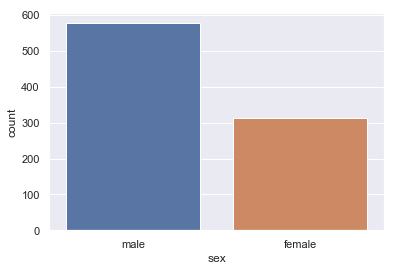

In [10]:
sns.countplot(x='sex', data=df_train)

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


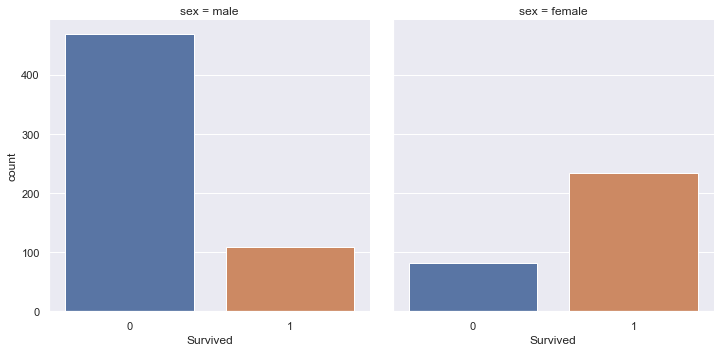

In [11]:
# Building bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'.
sns.factorplot(x='Survived', col='sex', kind='count', data=df_train)

# Looks like Women were more likely to survive than men

## Figuring out  fhow many women and how many men survived

In [12]:
df_train.groupby(['sex']).Survived.sum()

sex
female    233
male      109
Name: Survived, dtype: int64

# Checking proportion of women that survived, along with the proportion of men

In [13]:
print(df_train[df_train.sex == 'female'].Survived.sum()/df_train[df_train.sex == 'female'].Survived.count())
print(df_train[df_train.sex == 'male'].Survived.sum()/df_train[df_train.sex == 'male'].Survived.count())


0.7420382165605095
0.18890814558058924


# 74% of women survived, while 19% of men survived.

# Building second model and predicting that all women survived and all men didn't. 

# Once again, this is an unrealistic model, but it will provide a baseline against which to compare future models.

# Steps

1. Create a column 'Survived' for df_test that encodes the above prediction.
2. Save 'PassengerId' and 'Survived' columns of df_test to a .csv and submit to Kaggle.

In [14]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [15]:
df_test[['PassengerId', 'Survived']].to_csv('dataset/women_survive.csv', index=False)

# 2nd Submission Results


<img src='img/tit3.JPG'>
_____________________________________________________________________________________________________________________________

<img src='img/tit4.JPG'>


# Time for more exploration

# building bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


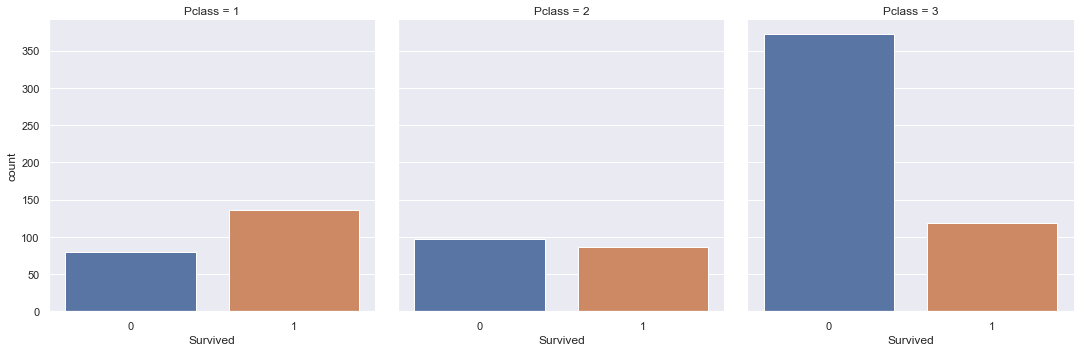

In [16]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train)

# looks like passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive

# building bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


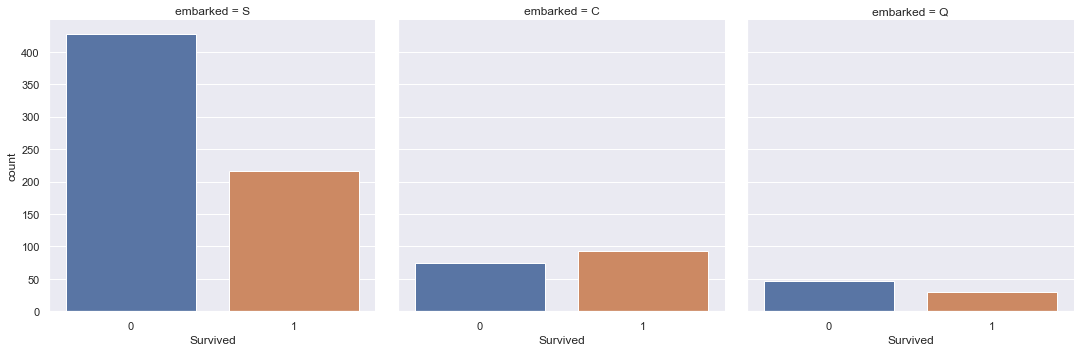

In [17]:
sns.factorplot(x='Survived', col='embarked', kind='count', data=df_train)

# from graphs, passengers that embarked in Southampton were less likely to survive.

# EDA with Numeric Variables

# plot a histogram of the 'Fare' column of df_train

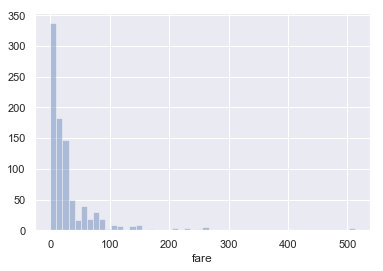

In [18]:
sns.distplot(df_train.fare, kde=False)

# Most passengers paid less than 100 for travelling with the Titanic

# plotting the column 'fare' for each value of 'Survived' on the same plot

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fare, dtype: object

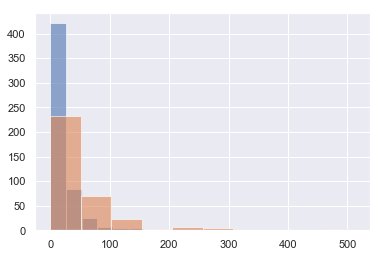

In [19]:
df_train.groupby('Survived').fare.hist(alpha=0.6)

# looks as though those that paid more had a higher chance of surviving

# plotting a histogram of the 'Age' column of df_train. You'll need to drop null values before doing so

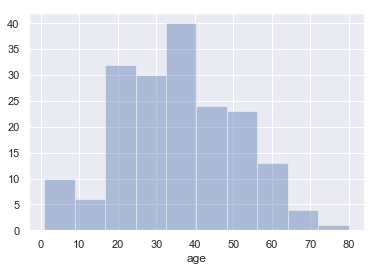

In [20]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.age, kde=False)

# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis

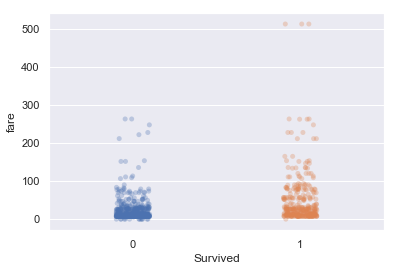

In [21]:
sns.stripplot(x='Survived', y='fare', data=df_train, alpha=0.3, jitter=True)

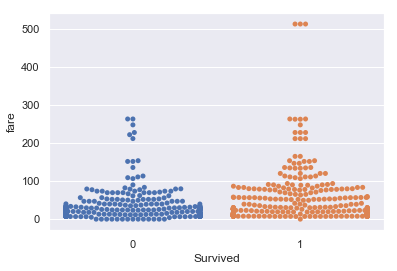

In [22]:
sns.swarmplot(x='Survived', y='fare', data=df_train)

# Fare definitely seems to be correlated with survival aboard the Titanic

# checking out summary statistics of 'Fare' as a function of survival

In [24]:
df_train.groupby('Survived').fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


# plotting a scatter plot of 'Age' against 'Fare', colored by 'Survived'

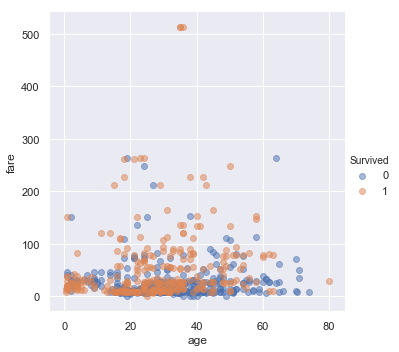

In [25]:
sns.lmplot(x='age', y='fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

# looks like those who survived either paid quite a bit for their ticket or they were young

# creating a pairplot of df_train, colored by 'Survived'. 

# A pairplot is a great way to display most of the information that you have already discovered in a single grid of plots.

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


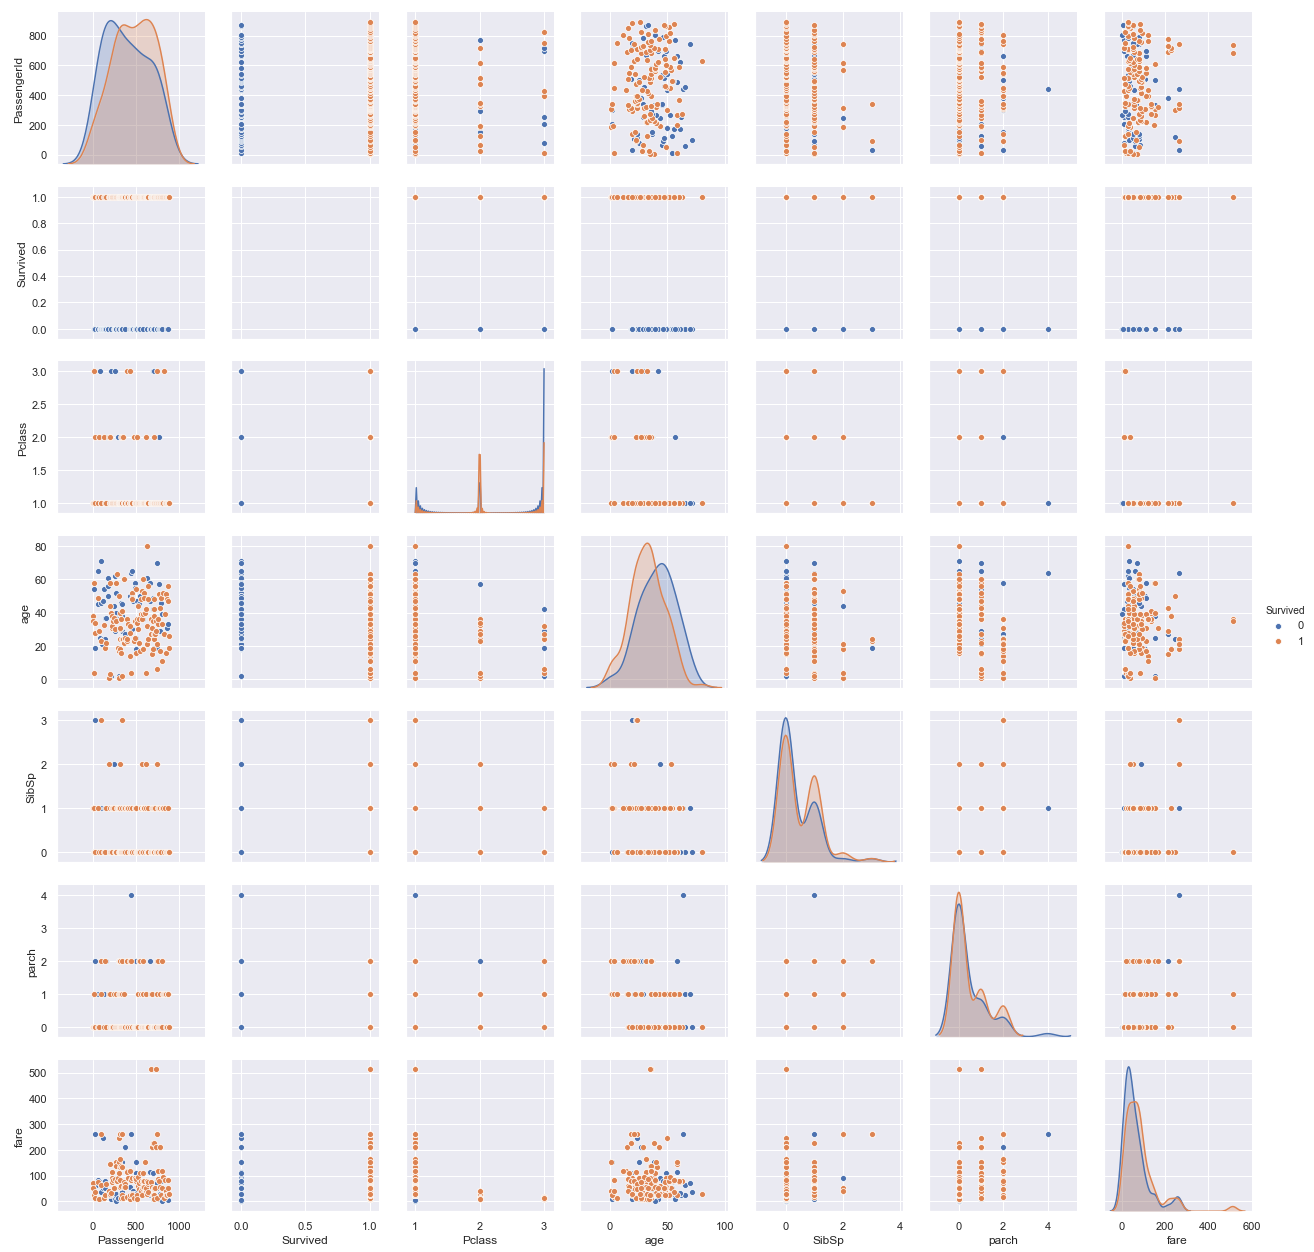

In [26]:
sns.pairplot(df_train_drop, hue='Survived')